### Let's import basic libraries to read the data and do some EDA

<span style="color:red">Note: Run this file with the base file - telecom_churn_data.csv</span>

**Evaluation criteria mentioned**
<br>

***Identifying important churn indicators and business recommendation (20%)***
<br>
- Important churn indicators are identified correctly. 
- Clear actionable recommendations are provided based on supporting evidence
<br>

***Modelling (churn prediction)(35%)***
<br>
- Dimensionality reduction is conducted correctly, including data preparation required for it.
- Class imbalance is handled using at least one of the techniques.
- Model hyperparameters are tuned using correct principles and the approach is explained clearly.
- A reasonable number and variety of different models are attempted and the best one is chosen based on key performance metrics.
- Model evaluation is conducted using an appropriate metric. 
- Model evaluation results are at par with the best possible models on this data set.
<br>

***EDA(35%)***
<br>

***Code conciseness(10%)***

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
#read the data
df_Churn = pd.read_csv('telecom_churn_data.csv')
#get the feel of the data
df_Churn.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


### Check the shape of the data

In [4]:
df_Churn.shape

(99999, 226)

### Check the null values in mobile_number

In [5]:
df_Churn['mobile_number'].isnull().sum()

0

 **Separate all columns that are indexed with '\_9'  to check the variance in the columns because we will be using to tag the churners later on.**    

In [6]:
cols1 = df_Churn.filter(like='_9').columns
cols2 = df_Churn.columns.difference(cols1)

### Since there are no null values for mobile number, let's check for the variance for every column

In [7]:
churn2 = df_Churn[cols2].copy()
mask = churn2.var()==0

In [8]:
mask[mask].index

Index(['circle_id', 'loc_ic_t2o_mou', 'loc_og_t2o_mou', 'std_ic_t2o_mou_6',
       'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_og_t2c_mou_6',
       'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2o_mou'],
      dtype='object')

**Let's drop those columns**

In [9]:
churn2 = churn2.drop(mask[mask].index,axis = 1)

*** check the date columns and start making a derived variable on the date difference ***

In [10]:
date_list = churn2.select_dtypes(include='O').columns

Let's impute the null values with 0

In [11]:
churn2[date_list] = churn2[date_list].fillna(0)

### ***we'll make the difference between the last date of the recharge as a derived feature***

In [12]:
date_list

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'last_date_of_month_6',
       'last_date_of_month_7', 'last_date_of_month_8'],
      dtype='object')

### Function to calculate the duration of the days for every month

In [13]:
name_list = []
def get_day_difference(last_date,main_date):
    name = 'last_'+ main_date.name[-6:]
    churn2[name] = pd.to_datetime(churn2[last_date.name]).dt.day - pd.to_datetime(churn2[main_date.name]).dt.day
#   get the names of the new columns
    name_list.append(name)

In [14]:
get_day_difference(churn2['last_date_of_month_6'],churn2['date_of_last_rech_6'])
get_day_difference(churn2['last_date_of_month_6'],churn2['date_of_last_rech_data_6'])
get_day_difference(churn2['last_date_of_month_7'],churn2['date_of_last_rech_7'])
get_day_difference(churn2['last_date_of_month_7'],churn2['date_of_last_rech_data_7'])
get_day_difference(churn2['last_date_of_month_8'],churn2['date_of_last_rech_8'])
get_day_difference(churn2['last_date_of_month_8'],churn2['date_of_last_rech_data_8'])

In [15]:
## new feature names are
name_list

['last_rech_6',
 'last_data_6',
 'last_rech_7',
 'last_data_7',
 'last_rech_8',
 'last_data_8']

Let us drop the end date columns as they have 0 variance

In [16]:
churn2 = churn2.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8'],axis=1)

In [17]:
df_Churn_June = churn2.filter(like='_6', axis=1)
df_Churn_July = churn2.filter(like='_7', axis=1)
df_Churn_August = churn2.filter(like='_8', axis=1)

In [18]:

df_Churn_June_num = df_Churn_June.select_dtypes(include = ['float64', 'int64'])
df_Churn_June_num.head()

,arpu_2g_6,arpu_3g_6,arpu_6,av_rech_amt_data_6,count_rech_2g_6,count_rech_3g_6,fb_user_6,ic_others_6,isd_ic_mou_6,isd_og_mou_6,...,std_og_t2t_mou_6,total_ic_mou_6,total_og_mou_6,total_rech_amt_6,total_rech_data_6,total_rech_num_6,vol_2g_mb_6,vol_3g_mb_6,last_rech_6,last_data_6
0,212.17,212.17,197.385,252.0,0.0,1.0,1.0,NaN,NaN,NaN,...,NaN,0.00,0.00,362,1.0,4,30.13,83.57,9,9
1,NaN,NaN,34.047,NaN,NaN,NaN,NaN,0.00,1.83,0.0,...,0.23,26.83,40.31,74,NaN,4,0.00,0.00,1,29
2,NaN,NaN,167.690,NaN,NaN,NaN,NaN,0.93,0.00,0.0,...,4.34,370.04,155.33,168,NaN,5,0.00,0.00,13,29
3,NaN,NaN,221.338,NaN,NaN,NaN,NaN,0.00,0.00,0.0,...,26.23,280.08,223.23,230,NaN,10,0.00,0.00,2,29
4,0.00,0.00,261.636,56.0,1.0,0.0,0.0,0.48,0.00,0.0,...,0.00,216.44,127.28,196,1.0,5,0.00,0.00,4,26


#### we'll try to find which features are strongly correlated with revenue or arpu. 
#### We'll store them in list 

In [19]:
df_Churn_June_num = df_Churn_June.select_dtypes(include = ['float64', 'int64'])
df_Churn_June_num.head()

#### we'll try to find which features are strongly correlated with revenue or arpu. 
#### We'll store them in list 

df_Churn_June_num = df_Churn_June_num.corr()['arpu_6'][:-1] # -1 because the latest row is arpu_6

imp_features_list_june = df_Churn_June_num[abs(df_Churn_June_num) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with revenue for June:\n{}".format(len(imp_features_list_june), imp_features_list_june))

df_Churn_July_num = df_Churn_July.select_dtypes(include = ['float64', 'int64'])

df_Churn_July_num = df_Churn_July_num.corr()['arpu_7'][:-1] # -1 because the latest row is arpu_7

imp_features_list_july = df_Churn_July_num[abs(df_Churn_July_num) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with revenue for July:\n{}".format(len(imp_features_list_july), imp_features_list_july))

df_Churn_August_num = df_Churn_August.select_dtypes(include = ['float64', 'int64'])

df_Churn_August_num = df_Churn_August_num.corr()['arpu_8'][:-1] # -1 because the latest row is arpu_7

imp_features_list_August = df_Churn_August_num[abs(df_Churn_August_num) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with revenue for August:\n{}".format(len(imp_features_list_August), imp_features_list_August))

There is 5 strongly correlated values with revenue for June:
arpu_6              1.000000
total_rech_amt_6    0.953017
total_og_mou_6      0.675876
offnet_mou_6        0.620054
total_rech_num_6    0.508769
Name: arpu_6, dtype: float64
There is 5 strongly correlated values with revenue for July:
arpu_7              1.000000
total_rech_amt_7    0.951995
total_og_mou_7      0.663038
offnet_mou_7        0.603864
arpu_3g_7           0.509490
Name: arpu_7, dtype: float64
There is 5 strongly correlated values with revenue for August:
arpu_8              1.000000
total_rech_amt_8    0.955952
total_og_mou_8      0.656806
offnet_mou_8        0.599479
max_rech_amt_8      0.501507
Name: arpu_8, dtype: float64


### So after checking june , july and august important features are:
<br>
- __total recharge amount__
- __total outgoing minutes of usage__
- __offnet minutes of usage__
- __max recharge amount__ 
- __revenue for 3g__ 

***Let's tag the high value customers now***

In [20]:
# Calculating the threshold recharge value to define high value customer

th_rech_val = churn2[["total_rech_amt_6","total_rech_amt_7"]].mean(axis = 1).quantile(0.7)
print("The threshold recharge value is: {}".format(th_rech_val))

The threshold recharge value is: 368.5


In [21]:
df_amt = churn2.filter(like='total_rech_amt')
df_amt.iloc[:,0:2].head()

,total_rech_amt_6,total_rech_amt_7
0,362,252
1,74,384
2,168,315
3,230,310
4,196,350


In [22]:
df_amt['mobile_number'] = churn2['mobile_number']

C:\Users\arry_\AppData\Local\conda\conda\envs\idp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [23]:
df_amt['total_rech_amt_6_7'] = (df_amt['total_rech_amt_6']+df_amt['total_rech_amt_7'])/2

C:\Users\arry_\AppData\Local\conda\conda\envs\idp\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
df_amt.head()

,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,mobile_number,total_rech_amt_6_7
0,362,252,252,7000842753,307.0
1,74,384,283,7001865778,229.0
2,168,315,116,7001625959,241.5
3,230,310,601,7001204172,270.0
4,196,350,287,7000142493,273.0


In [25]:
df_amt=df_amt[['mobile_number','total_rech_amt_6','total_rech_amt_7','total_rech_amt_6_7','total_rech_amt_8']]

***I need to predict churn only for the high-value customers. Define high-value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).***

In [26]:
##get the 70th percentile for the total recharge amount
p = df_amt['total_rech_amt_6_7'].quantile(0.7)
p
##any users less than this amount can be ignored

368.5

In [27]:
df_amt[df_amt['total_rech_amt_6_7']>=p].shape

(30011, 5)

In [28]:
df_amt_final = df_amt[df_amt['total_rech_amt_6_7']>=p]

In [29]:
df_amt_final.shape

(30011, 5)

We need to subset these mobile numbers from this data set on the entire data set

In [30]:
df_final = churn2[churn2['mobile_number'].isin(df_amt_final['mobile_number'])]

Let's add the mobile number before merging the 9th month columns

In [31]:
col_list = list(cols1)
col_list.append('mobile_number')

In [32]:
df_Churn[col_list].head()

,last_date_of_month_9,arpu_9,onnet_mou_9,offnet_mou_9,roam_ic_mou_9,roam_og_mou_9,loc_og_t2t_mou_9,loc_og_t2m_mou_9,loc_og_t2f_mou_9,loc_og_t2c_mou_9,...,vol_3g_mb_9,arpu_3g_9,arpu_2g_9,night_pck_user_9,monthly_2g_9,sachet_2g_9,monthly_3g_9,sachet_3g_9,fb_user_9,mobile_number
0,9/30/2014,21.100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.00,NaN,NaN,NaN,0,0,0,0,NaN,7000842753
1,9/30/2014,86.285,18.34,53.76,0.00,0.00,18.34,53.76,0.00,0.00,...,0.00,NaN,NaN,NaN,0,0,0,0,NaN,7001865778
2,9/30/2014,290.714,74.81,118.91,38.49,70.94,14.39,28.16,22.24,0.48,...,8.42,2.84,0.0,0.0,0,1,0,0,1.0,7001625959
3,9/30/2014,389.500,241.71,113.54,0.00,0.00,15.49,65.46,2.06,0.00,...,0.00,NaN,NaN,NaN,0,0,0,0,NaN,7001204172
4,9/30/2014,163.426,58.78,45.81,0.00,0.00,58.78,37.89,1.93,0.00,...,0.00,NaN,NaN,NaN,0,0,0,0,NaN,7000142493


In [33]:
churn3 = pd.merge(df_final,df_Churn[col_list],on='mobile_number',how='inner')

## Let us mark the churners now since we have already got the high value cutomers from the above pre-processing. 

In this project, we will use the usage-based definition to define churn.
Tag churners and remove attributes of the churn phase.Tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes we will need to use to tag churners are:
<br>
- __total_ic_mou_9__
- __total_og_mou_9__
- __vol_2g_mb_9__
- __vol_3g_mb_9__
<br>

***After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).***

In [34]:
churn_attr = ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
churn3['churn'] = churn3[churn_attr].sum(axis=1).map(lambda x: 1 if x == 0 else 0)

Let's make a copy and drop the attributes having _9

In [35]:
drop_list = churn3.filter(like='_9')

In [36]:
telecom_churn = churn3.drop(drop_list,axis=1).copy()

Let's check out the shape again

In [37]:
telecom_churn.shape

(30011, 166)

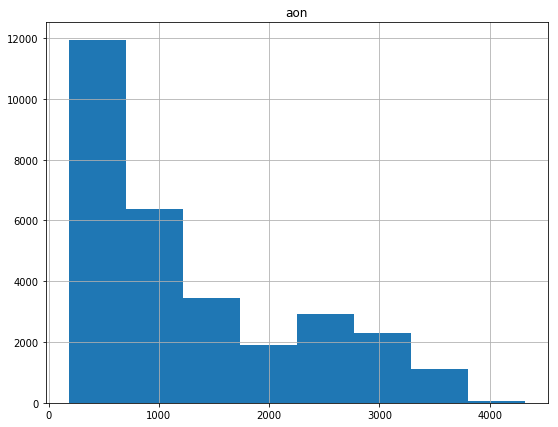

In [38]:
ax = telecom_churn.hist(column='aon', bins=8,figsize=(9,7))

Let's check out the ditribution for the new derived features ['last_rech_6','last_data_6','last_rech_7','last_data_7','last_rech_8','last_data_8']

In [39]:
new_features = ['last_rech_6','last_data_6','last_rech_7','last_data_7','last_rech_8','last_data_8']

(array([ 3268.,  2106.,  1415.,  1012.,  1271.,  1185.,  1040., 18714.]),
 array([ 0.  ,  3.75,  7.5 , 11.25, 15.  , 18.75, 22.5 , 26.25, 30.  ]),
 <a list of 8 Patch objects>)

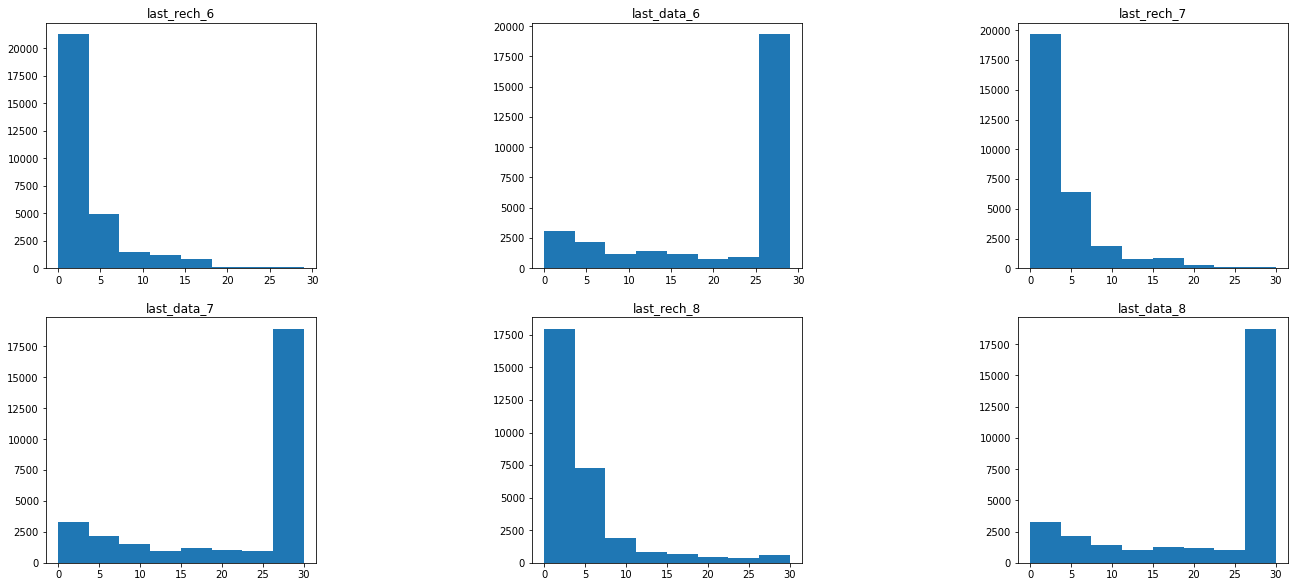

In [40]:
plt.subplots_adjust(left=None, bottom=None, right=3, top=2, wspace=0.8, hspace=None)
plt.subplot(231)
plt.title(new_features[0])
plt.hist(telecom_churn[new_features[0]],bins=8)
plt.subplot(232)
plt.title(new_features[1])
plt.hist(telecom_churn[new_features[1]],bins=8)
plt.subplot(233)
plt.title(new_features[2])
plt.hist(telecom_churn[new_features[2]],bins=8)
plt.subplot(234)
plt.title(new_features[3])
plt.hist(telecom_churn[new_features[3]],bins=8)
plt.subplot(235)
plt.title(new_features[4])
plt.hist(telecom_churn[new_features[4]],bins=8)
plt.subplot(236)
plt.title(new_features[5])
plt.hist(telecom_churn[new_features[5]],bins=8)
# fig.tight_layout()

## Saswath please look into this
From the above figures we can see that
- most people will recharge for data near the end of the month
- most people will recharge for talk time towards the beginning of the month

__Let's check the churn percentage__

In [41]:
churn = (sum(telecom_churn['churn'])/len(telecom_churn['churn'].index))*100
print ("churn percentage ",churn)

churn percentage  8.64016527273333


## The churn percentage is very low and there is a class imbalance so we need to be careful while trying to tune the parameters for predicting the values

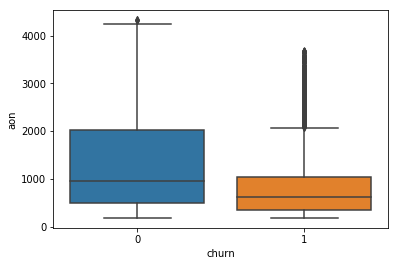

In [42]:
sns.boxplot(x = 'churn', y ='aon', data = telecom_churn)

_We can conclude two things from the above subplot_
- Churners are having relatively low age on networks compared to non churners¶
- Churn data has more outliers as compared to non-churners

__Let's look at the Average Revenue Per Month__

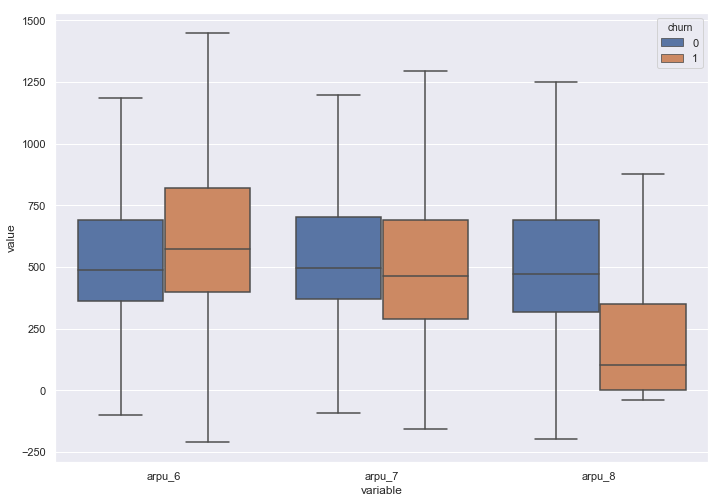

In [43]:
mdf = pd.melt(telecom_churn[['arpu_6','arpu_7','arpu_8','churn']], id_vars=['churn'],value_vars=['arpu_6','arpu_7','arpu_8'])
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x = 'variable', y = 'value', hue = 'churn', data = mdf, showfliers=False)

__From above analysis it is evident that for churners, average revenue per user falls in general while going from month June to August__

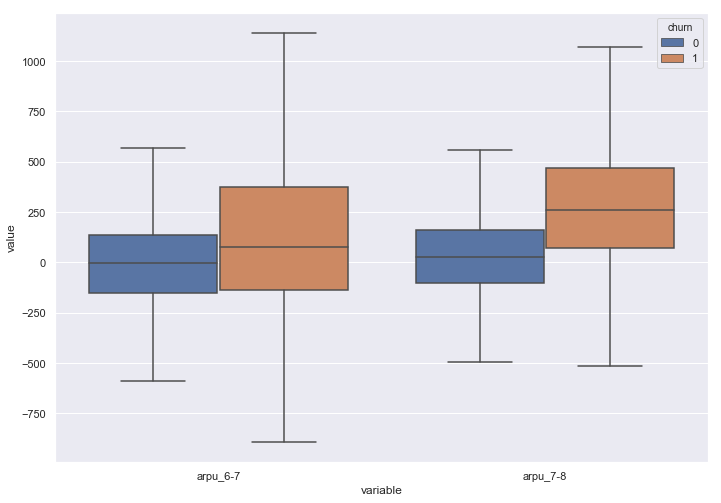

In [44]:
telecom_churn['arpu_6-7'] = telecom_churn['arpu_6'] -  telecom_churn['arpu_7']
telecom_churn['arpu_7-8'] = telecom_churn['arpu_7'] -  telecom_churn['arpu_8']

mdf = pd.melt(telecom_churn[['arpu_6-7','arpu_7-8','churn']], id_vars=['churn'],value_vars=['arpu_6-7','arpu_7-8'])

sns.boxplot(x = 'variable', y = 'value', hue = 'churn', data = mdf, showfliers=False)

**From above analysis it is evident that difference in average revenue per user is a discriminative factor for predicting churner and non churner**

We need to check for null values in the entire data set again.
Let's fill them with 0 because if we impute them with data, it will provide improper information on the columns

In [45]:
telecom_churn = telecom_churn.fillna(0)

In [46]:
##First check for categorical values
telecom_churn.nunique().sort_values().head(10)

night_pck_user_6    2
night_pck_user_8    2
fb_user_8           2
fb_user_7           2
fb_user_6           2
night_pck_user_7    2
churn               2
monthly_2g_6        5
monthly_2g_7        6
monthly_2g_8        6
dtype: int64

Let's make a category list of these 7 components

In [47]:
cat_list = telecom_churn.nunique().sort_values()[0:7].index

In [48]:
cat_list

Index(['night_pck_user_6', 'night_pck_user_8', 'fb_user_8', 'fb_user_7',
       'fb_user_6', 'night_pck_user_7', 'churn'],
      dtype='object')

### Let's start with PCA and check the model characteristics

In [49]:
dt_list = list(telecom_churn.filter(like = 'date').columns)

In [50]:
dt_list

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

***Let's make a function to extract just the date from the columns***

In [51]:
def get_day(X):
    telecom_churn[X] = pd.to_datetime(telecom_churn[X]).dt.day
for cols in dt_list:
    get_day(cols)

In [52]:
## add the derived date features to this list to keep from normalizing
dt_list.extend(name_list)
## add the categorical to this list to keep from normalizing
dt_list.extend(cat_list)
dt_list

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'last_rech_6',
 'last_data_6',
 'last_rech_7',
 'last_data_7',
 'last_rech_8',
 'last_data_8',
 'night_pck_user_6',
 'night_pck_user_8',
 'fb_user_8',
 'fb_user_7',
 'fb_user_6',
 'night_pck_user_7',
 'churn']

In [53]:
norm_list= telecom_churn.columns.difference(dt_list)

In [54]:
##Let's make a copy of the data set before proceedings
PCA_churn = telecom_churn.copy()

**Let's split the Train and test, we will normalize them separately**

In [55]:
X = PCA_churn.drop(['churn','mobile_number'],axis=1)
y = PCA_churn['churn']

Import the libraries to split and perform PCA, to identify the components and use Logistic regression as our classifier

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [58]:
n_list = norm_list.drop(labels='mobile_number')

In [59]:
#on Train
X_train[n_list] = (X_train[n_list]-X_train[n_list].mean())/X_train[n_list].std()

C:\Users\arry_\AppData\Local\conda\conda\envs\idp\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [60]:
#on Test
X_test[n_list] = (X_test[n_list]-X_test[n_list].mean())/X_test[n_list].std()

C:\Users\arry_\AppData\Local\conda\conda\envs\idp\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


Let's make the PCA object

In [61]:
pca = PCA(svd_solver='randomized', random_state=50)
# fit the train set
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=50,
  svd_solver='randomized', tol=0.0, whiten=False)

Now we'll Try to see the components explained by the two components

In [62]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,PC1,PC2,Feature
0,0.000548,-0.000261,aon
1,0.018206,0.013274,arpu_2g_6
2,0.018917,0.005608,arpu_2g_7
3,0.019082,-0.010100,arpu_2g_8
4,0.017311,0.012513,arpu_3g_6


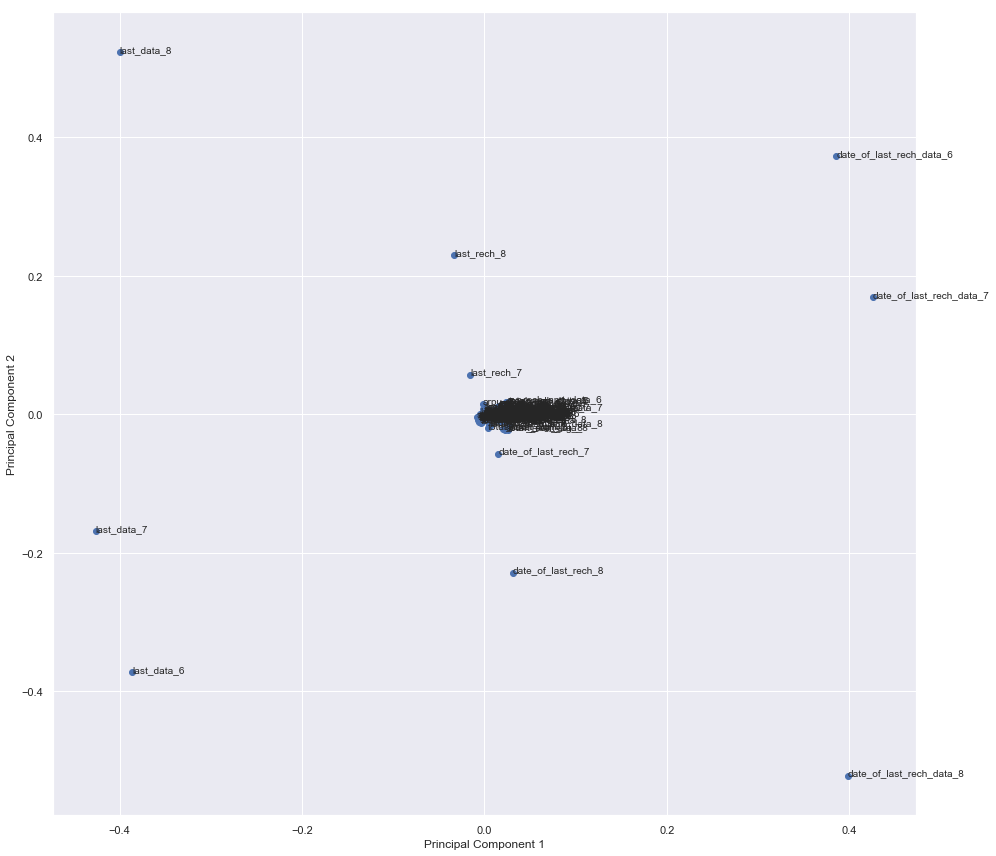

In [63]:
%matplotlib inline
fig = plt.figure(figsize = (13,12))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

Let's plot and select the right number of components required

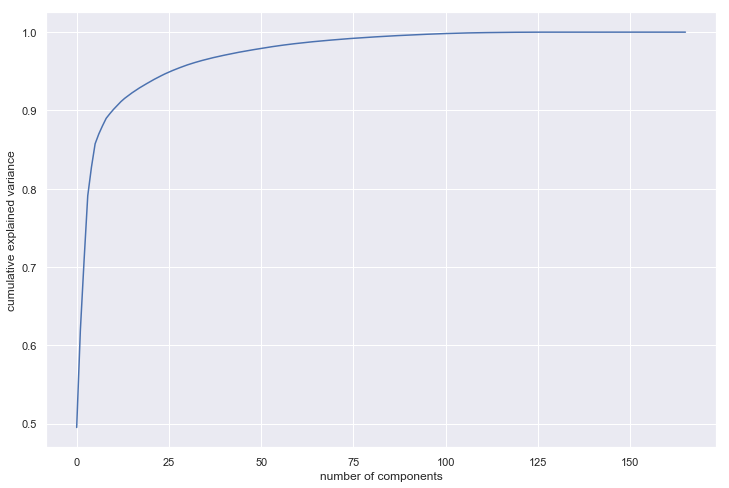

In [64]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

We see that 50 components can explain more than 95% of the variance in the data set, so we will usw 50 components

In [65]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=50)

In [66]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(21007, 50)

In [67]:
corrmat = np.corrcoef(df_train_pca.transpose())
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.032754424201774615 , min corr:  -0.02159830730844615


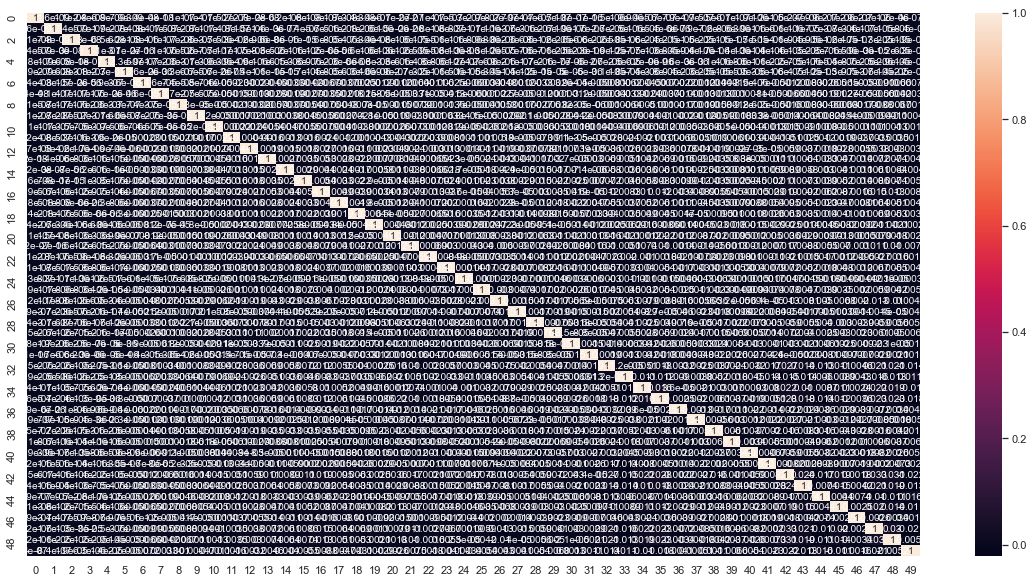

In [68]:
import seaborn as sns
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

__Let's transform the test set as well__

In [69]:
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(9004, 50)

In [70]:
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

C:\Users\arry_\AppData\Local\conda\conda\envs\idp\lib\site-packages\sklearn\linear_model\logistic.py:436: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [71]:
#Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.8981574655609148'

In [72]:
y_pred_df = pd.DataFrame(pred_probs_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[0]]
# Let's see the head
# y_pred_1.head()
y_test_df = pd.DataFrame(y_test)
# y_test_df.head()
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0: 'churn_Prob'})
# y_pred_final['pred_churn'] = y_pred_final.pred_churn.map( lambda x: 1 if x > 0.5 else 0)

In [73]:
y_pred_final.head()

,churn,churn_Prob
0,0,0.587823
1,0,0.376486
2,0,0.011990
3,0,0.025379
4,0,0.022412


In [74]:
y_pred_final['predicted'] = y_pred_final.churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

Let's check the confusion matrix

In [75]:
confusion = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.predicted)
confusion

array([[8139,   95],
       [ 560,  210]], dtype=int64)

**Model Evaluation**

In [76]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.587823,1,1,1,1,1,1,1,0,0,0,0
1,0,0.376486,0,1,1,1,1,0,0,0,0,0,0
2,0,0.011990,0,1,0,0,0,0,0,0,0,0,0
3,0,0.025379,0,1,0,0,0,0,0,0,0,0,0
4,0,0.022412,0,1,0,0,0,0,0,0,0,0,0


In [77]:
# Predicted     not_churn    churn
# Actual
# not_churn        1326      166
# churn            249       333  

In [78]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
#     cm1.accuracy
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
#     sensi = cm1.
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.085518  0.000000  1.000000
0.1   0.1  0.831853  0.832281  0.827273
0.2   0.2  0.907597  0.926767  0.702597
0.3   0.3  0.928032  0.960772  0.577922
0.4   0.4  0.929920  0.979718  0.397403
0.5   0.5  0.927255  0.988462  0.272727
0.6   0.6  0.927588  0.995749  0.198701
0.7   0.7  0.924589  0.998057  0.138961
0.8   0.8  0.922035  0.999028  0.098701
0.9   0.9  0.920702  0.999636  0.076623


<Figure size 2880x2880 with 0 Axes>

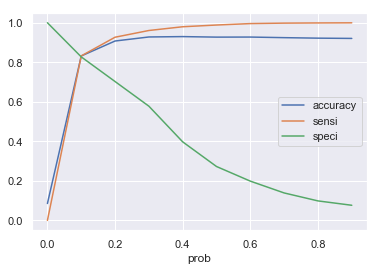

In [79]:
plt.figure(figsize=(40,40))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [80]:
y_pred_final['final_predicted'] = y_pred_final.churn_Prob.map( lambda x: 1 if x > 0.10 else 0)

In [81]:
confusion = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted)
confusion

array([[6853, 1381],
       [ 133,  637]], dtype=int64)

In [82]:
metrics.accuracy_score(y_pred_final.churn, y_pred_final.final_predicted)

0.8318525099955575

In [83]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

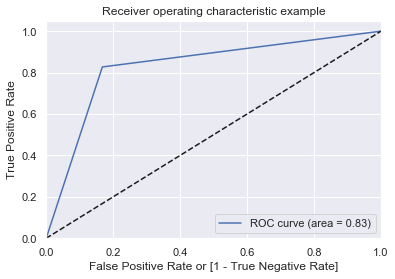

(array([0.        , 0.16771921, 1.        ]),
 array([0.        , 0.82727273, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [84]:
draw_roc(y_pred_final.churn, y_pred_final.final_predicted)

## Keeping separate space for further hyper parameter tuning
- Need to work on it

Let's find the optimal value of K before trying further models as we will need to cross validate as well

In [107]:
shape = X_train.shape[0]
partition_size = shape*0.2
#assuming we will keep as ide 20 percent of data for the test partition
print("partition size",partition_size,"k-value-",round(shape/partition_size))

partition size 4201.400000000001 k-value- 5


**Let's try Recursive feature elimination with cross validation and random forest classification to reduce the number of features and check if our derived features contribute much**
<br>

<span style="color:red"><b>WARNING:</b></span>
<span style="color:red">Run with caution,may take long running times</span>

**Uncomment to run the below code(Subject to change)**

In [109]:
# from sklearn.feature_selection import RFECV
# from sklearn.ensemble import RandomForestClassifier

# #suppress future warnings
# import warnings
# warnings.simplefilter(action='ignore', category=FutureWarning)

# clf_rf_4 = RandomForestClassifier(class_weight="balanced") 
# #The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data

# rfecv = RFECV(estimator=clf_rf_4, step=1,cv=5,scoring='roc_auc') 
# #5-fold cross-validation with scoring as auc because accuracy will not work for imbalanced class

# rfecv = rfecv.fit(X_train, y_train)

# print('Optimal number of features :', rfecv.n_features_)
# print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 25
Best features : Index(['aon', 'arpu_8', 'date_of_last_rech_8', 'last_day_rch_amt_8',
       'loc_ic_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_og_mou_8',
       'loc_og_t2m_mou_8', 'max_rech_amt_6', 'max_rech_amt_8', 'onnet_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_8',
       'total_og_mou_7', 'total_og_mou_8', 'total_rech_amt_6',
       'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_num_7',
       'last_rech_8', 'arpu_6-7', 'arpu_7-8'],
      dtype='object')


Optimal number of features : 25
Best features : ['aon', 'arpu_8', 'date_of_last_rech_8', 'last_day_rch_amt_8','loc_ic_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_og_mou_8','loc_og_t2m_mou_8', 'max_rech_amt_6', 'max_rech_amt_8', 'onnet_mou_7','roam_ic_mou_8', 'roam_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_8','total_og_mou_7', 'total_og_mou_8', 'total_rech_amt_6','total_rech_amt_7', 'total_rech_amt_8', 'total_rech_num_7',**'last_rech_8', 'arpu_6-7', 'arpu_7-8'**]

***Features in the bold are the derived features,we had added earlier!!***


In [112]:
##Store these columns in a list
optimal_cols = ['aon', 'arpu_8', 'date_of_last_rech_8', 'last_day_rch_amt_8','loc_ic_mou_8', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_og_mou_8','loc_og_t2m_mou_8', 'max_rech_amt_6', 'max_rech_amt_8', 'onnet_mou_7','roam_ic_mou_8', 'roam_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_8','total_og_mou_7', 'total_og_mou_8', 'total_rech_amt_6','total_rech_amt_7', 'total_rech_amt_8', 'total_rech_num_7','last_rech_8', 'arpu_6-7', 'arpu_7-8']
# optimal_cols = X_train.columns[rfecv.support_]

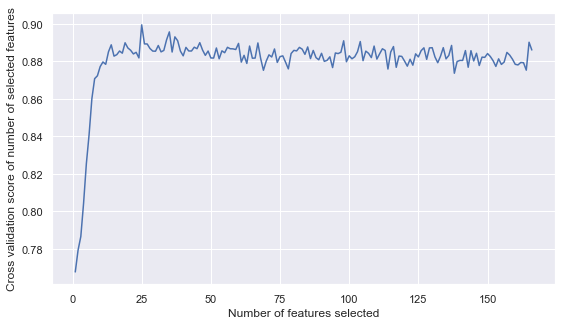

In [111]:
## for k = 5
plt.figure(figsize=(9,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Let's build a Logistic Regression model with these features and Cross validate across the train set

<br>

<span style="color:red"><b>WARNING:</b></span>
<span style="color:red">Run with caution,may take long running times</span>



In [114]:
#suppress convergence warnings
warnings.simplefilter(action='ignore', category=ConvergenceWarning)
from sklearn.model_selection import GridSearchCV
logsk = LogisticRegression()
penalty = ['l1', 'l2']
C = np.logspace(0, 4, 10)
hyperparameters = dict(C=C, penalty=penalty)
clf = GridSearchCV(estimator = logsk,param_grid = hyperparameters, cv=5, verbose=0,scoring='accuracy',return_train_score=True)
model_cv = clf.fit(X_train[optimal_cols], y_train)

C:\Users\arry_\AppData\Local\conda\conda\envs\idp\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\arry_\AppData\Local\conda\conda\envs\idp\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\arry_\AppData\Local\conda\conda\envs\idp\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\arry_\AppData\Local\conda\conda\envs\idp\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\arry_\AppData\Local\conda\conda\envs\idp\lib\site-packages\sklearn\svm\base

In [115]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.448856,0.292107,0.001605,0.000200,1,l1,"{'C': 1.0, 'penalty': 'l1'}",0.92099,0.922418,0.924798,...,0.922740,0.001275,1,0.923118,0.923118,0.922821,0.922647,0.923008,0.922942,0.000184
1,0.270118,0.028259,0.001404,0.000200,1,l2,"{'C': 1.0, 'penalty': 'l2'}",0.92099,0.922418,0.924560,...,0.922740,0.001182,1,0.923118,0.923059,0.922702,0.922647,0.923068,0.922919,0.000201
2,5.321169,0.307812,0.001603,0.000201,2.78256,l1,"{'C': 2.7825594022071245, 'penalty': 'l1'}",0.92099,0.922418,0.924560,...,0.922740,0.001182,1,0.923059,0.922999,0.922761,0.922587,0.923068,0.922895,0.000190
3,0.295890,0.013973,0.001601,0.000202,2.78256,l2,"{'C': 2.7825594022071245, 'penalty': 'l2'}",0.92099,0.922418,0.924560,...,0.922692,0.001161,16,0.923118,0.922940,0.922702,0.922587,0.923068,0.922883,0.000206
4,5.626699,1.338063,0.001702,0.000242,7.74264,l1,"{'C': 7.742636826811269, 'penalty': 'l1'}",0.92099,0.922418,0.924798,...,0.922740,0.001239,1,0.923118,0.922999,0.922702,0.922647,0.923068,0.922907,0.000194


Let us check the best Hyperparameters vs the accuracy

In [116]:
print (model_cv.best_score_)
print (model_cv.best_params_)

0.9227400390346076
{'C': 1.0, 'penalty': 'l1'}


We'll make a model with these hyperparameters

In [120]:
logsk = LogisticRegression(C=1.0,penalty='l1')
log_model = logsk.fit(X_train[optimal_cols],y_train)

In [129]:
log_model.predict_proba(X_test[optimal_cols])

array([[0.55336395, 0.44663605],
       [0.83413331, 0.16586669],
       [0.99266313, 0.00733687],
       ...,
       [0.97152285, 0.02847715],
       [0.91802142, 0.08197858],
       [0.87288817, 0.12711183]])

**Getting the probability**

In [130]:
pred_probs_test = log_model.predict_proba(X_test[optimal_cols])[:,1]##Since we are concerned with class 1 only
"{}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.8946036232409804'

In [131]:
y_pred_df = pd.DataFrame(pred_probs_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[0]]
# Let's see the head
# y_pred_1.head()
y_test_df = pd.DataFrame(y_test)
# y_test_df.head()
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
y_pred_final = pd.concat([y_test_df,y_pred_1],axis=1)
y_pred_final= y_pred_final.rename(columns={ 0: 'churn_Prob'})

In [132]:
y_pred_final.head()

,churn,churn_Prob
0,0,0.446636
1,0,0.165867
2,0,0.007337
3,0,0.014441
4,0,0.005828


In [134]:
y_pred_final['predicted'] = y_pred_final.churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

In [135]:
confusion = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.predicted)
confusion

array([[8148,   86],
       [ 575,  195]], dtype=int64)

In [136]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.446636,0,1,1,1,1,1,0,0,0,0,0
1,0,0.165867,0,1,1,0,0,0,0,0,0,0,0
2,0,0.007337,0,1,0,0,0,0,0,0,0,0,0
3,0,0.014441,0,1,0,0,0,0,0,0,0,0,0
4,0,0.005828,0,1,0,0,0,0,0,0,0,0,0


In [144]:
##Further Hyperparameter tuning on the probability threshold
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
#     cm1.accuracy
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
#     sensi = cm1.
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.085518  0.000000  1.000000
0.1   0.1  0.826188  0.825358  0.835065
0.2   0.2  0.906819  0.925917  0.702597
0.3   0.3  0.924034  0.959679  0.542857
0.4   0.4  0.925922  0.980690  0.340260
0.5   0.5  0.926588  0.989556  0.253247
0.6   0.6  0.926366  0.995264  0.189610
0.7   0.7  0.924145  0.997935  0.135065
0.8   0.8  0.921590  0.999150  0.092208
0.9   0.9  0.920369  0.999757  0.071429


<Figure size 2880x2880 with 0 Axes>

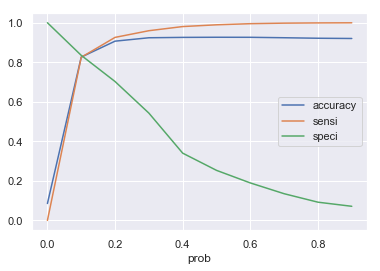

In [138]:
plt.figure(figsize=(40,40))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [140]:
y_pred_final['final_predicted'] = y_pred_final.churn_Prob.map( lambda x: 1 if x > 0.10 else 0)

In [141]:
confusion = metrics.confusion_matrix(y_pred_final.churn, y_pred_final.final_predicted)
confusion

array([[6796, 1438],
       [ 127,  643]], dtype=int64)

In [142]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

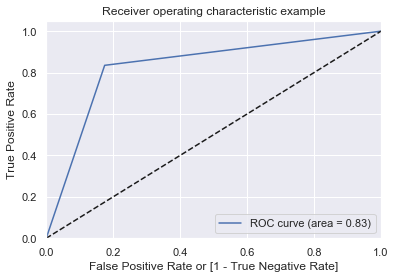

(array([0.        , 0.17464173, 1.        ]),
 array([0.        , 0.83506494, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [143]:
draw_roc(y_pred_final.churn, y_pred_final.final_predicted)

**We can see that our 25 feature regularized Logistic regression model works equally better as the PCA model, we built earlier with 45 features!**.
<br>

This is a more generalized model and we can apply boosting on it later

## Remaining Integrations and tests
<br>

- ADA or XG boost
- Decision Tree with CV and tree image(Sashwatha, please help me on this)
- Random Forest only with the 25 features, or maybe run on whole of the Data set(Saswatha, please look into this)
- Story to the road to the best model(Nil Sir, please look into this.)

<span style="color:red">Model Evaluation techniques would need to be kept in a function if possible</span>